# Support vector machines

Support Vector Machines (SVM) are supervised learning models used for classification and regression tasks. They work by finding the hyperplane that best separates the data into different classes.

What is a Support Vector?
Support vectors are the data points that are closest to the hyperplane. These points are critical in defining the position and orientation of the hyperplane. They lie on the edge of the margin, which is the region between the two classes.

What is Not a Support Vector?
Data points that are not support vectors lie outside the margin and do not directly influence the position of the hyperplane. These points are correctly classified and are further away from the decision boundary.

How Does Removing Support Vectors Affect the Model?
Removing support vectors can significantly affect the model because they are the critical points that define the decision boundary. Removing them can change the position and orientation of the hyperplane, potentially leading to a different classification result. On the other hand, removing non-support vectors typically has little to no effect on the model.

c:\Users\zoona\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


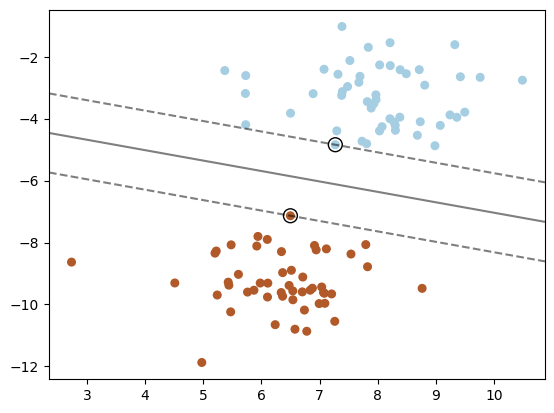

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Load dataset
X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=6)

# Fit the model
clf = SVC(kernel='linear')
clf.fit(X, y)

# Plot the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# Plot the support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

# Plot the decision boundary and margins
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.show()

### Correctly and Incorrectly Classified Points in SVM

**Correctly Classified Points**

- **Support Vectors**: These are the correctly classified points that lie on the margin boundaries. They are crucial in defining the decision boundary.
- **Non-Support Vectors**: These are the correctly classified points that lie outside the margin. They do not influence the decision boundary directly.

**Incorrectly Classified Points**

- **Support Vectors**: In the case of soft-margin SVM, some points can be incorrectly classified but still lie within the margin. These points are also considered support vectors because they influence the decision boundary.

### Why SVM is Fast

1. Convex Optimization: SVM uses convex optimization techniques to find the optimal hyperplane, which ensures that the solution is globally optimal and can be found efficiently.

2. Kernel Trick: The kernel trick allows SVM to operate in high-dimensional spaces without explicitly computing the coordinates of the data in that space, which reduces computational complexity.
3. Sparse Solution: SVM solutions are sparse because only the support vectors are needed to define the decision boundary. This reduces the amount of data the model needs to process during prediction.



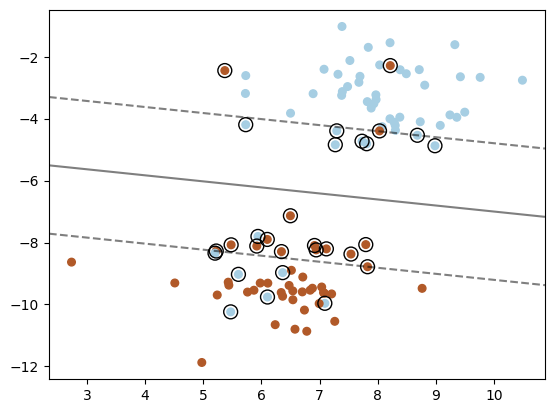

In [2]:
#Visualization of Correctly and Incorrectly Classified Points

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Load dataset
X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=6)

# Introduce some noise (incorrectly classified points)
y[::10] = 1 - y[::10]

# Fit the model
clf = SVC(kernel='linear', C=1)
clf.fit(X, y)

# Plot the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# Plot the support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

# Plot the decision boundary and margins
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.show()

### Removing non-support vectors from an SVM model

- the decision boundary will not change

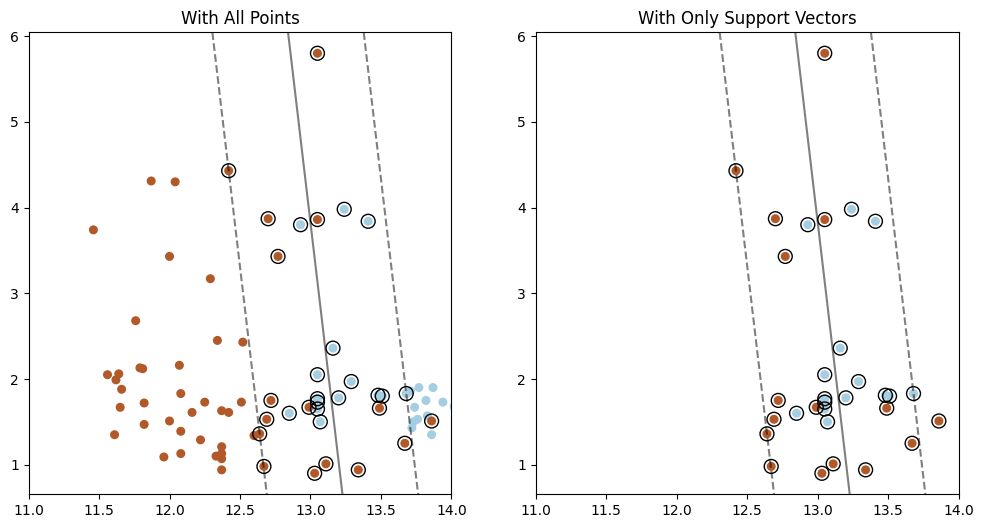

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Load the wine dataset
wine = datasets.load_wine()
X = wine.data[:, :2]  # Use only the first two features
y = wine.target

# For simplicity, let's only use two classes
X = X[y != 2]
y = y[y != 2]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the model
clf = SVC(kernel='linear', C=1)
clf.fit(X_train, y_train)

# Plot the decision boundary with all points
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("With All Points")
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

ax = plt.gca()
xlim = (11, 14)  # Limit the x-axis
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.set_xlim(xlim)
ax.set_ylim(ylim)

# Remove non-support vectors from the training set
support_indices = clf.support_
X_train_reduced = X_train[support_indices]
y_train_reduced = y_train[support_indices]

# Fit the model again with only support vectors
clf_reduced = SVC(kernel='linear', C=1)
clf_reduced.fit(X_train_reduced, y_train_reduced)

# Plot the decision boundary with only support vectors
plt.subplot(1, 2, 2)
plt.title("With Only Support Vectors")
plt.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], c=y_train_reduced, s=30, cmap=plt.cm.Paired)
plt.scatter(clf_reduced.support_vectors_[:, 0], clf_reduced.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

ax = plt.gca()
xlim = (11, 14)  # Limit the x-axis
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf_reduced.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.show()

## Kernel SVM

### Transforming features

- fitting a linear model in a transformed space corresponds to fitting a non-linear model in the original space

### Transforming Features in Kernel SVMs

Kernel SVMs allow us to transform the original feature space into a higher-dimensional space where it is easier to find a linear separation between classes. This transformation is done implicitly using kernel functions, which compute the dot product of the transformed features without explicitly performing the transformation.

Common kernel functions include:
- **Linear Kernel**: \( K(x, y) = x \cdot y \)
- **Polynomial Kernel**: \( K(x, y) = (x \cdot y + c)^d \)
- **Radial Basis Function (RBF) Kernel**: \( K(x, y) = \exp(-\gamma \|x - y\|^2) \)

### Demonstrating Overfitting with Kernel SVMs and Gamma

The `gamma` parameter in the RBF kernel controls the influence of a single training example. A high value of `gamma` means that the decision boundary will be very tight around the training examples, which can lead to overfitting.

Here is a visual example using the `make_moons` dataset to demonstrate how different values of `gamma` can result in overfitting:



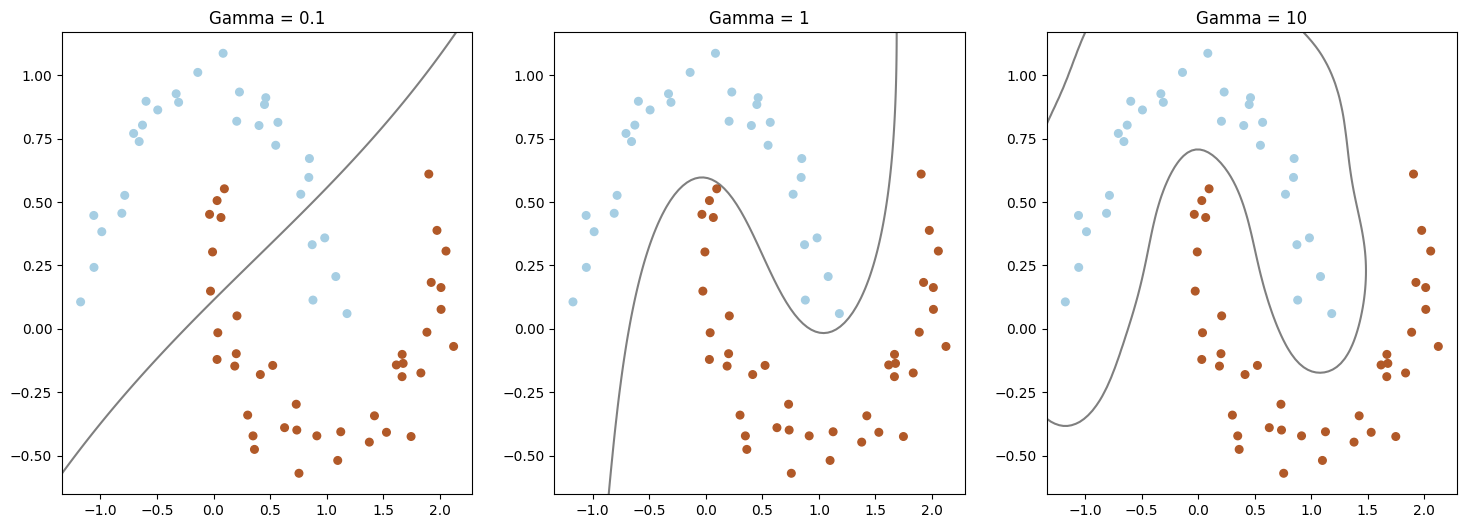

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Generate dataset
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the model with different gamma values
gamma_values = [0.1, 1, 10]
plt.figure(figsize=(18, 6))

for i, gamma in enumerate(gamma_values):
    clf = SVC(kernel='rbf', gamma=gamma)
    clf.fit(X_train, y_train)
    
    # Plot the decision boundary
    plt.subplot(1, 3, i + 1)
    plt.title(f"Gamma = {gamma}")
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)
    
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    xx = np.linspace(xlim[0], xlim[1], 100)
    yy = np.linspace(ylim[0], ylim[1], 100)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    
    ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.show()



### Explanation
- **Gamma = 0.1**: The decision boundary is smooth and generalizes well.
- **Gamma = 1**: The decision boundary starts to fit the training data more closely.
- **Gamma = 10**: The decision boundary is very tight around the training examples, indicating overfitting.

This visual example demonstrates how increasing the `gamma` parameter can lead to overfitting in kernel SVMs.

Similar code found with 2 license types

GridSearchCV is a powerful tool in scikit-learn that allows you to perform an exhaustive search over a specified parameter grid for an estimator. It helps in finding the best combination of hyperparameters for your model.

Here is an example of how to use GridSearchCV to find the best `gamma` and `C` parameters for an SVM with the RBF kernel:



Best parameters: {'C': 1, 'gamma': 10}
Best cross-validation score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



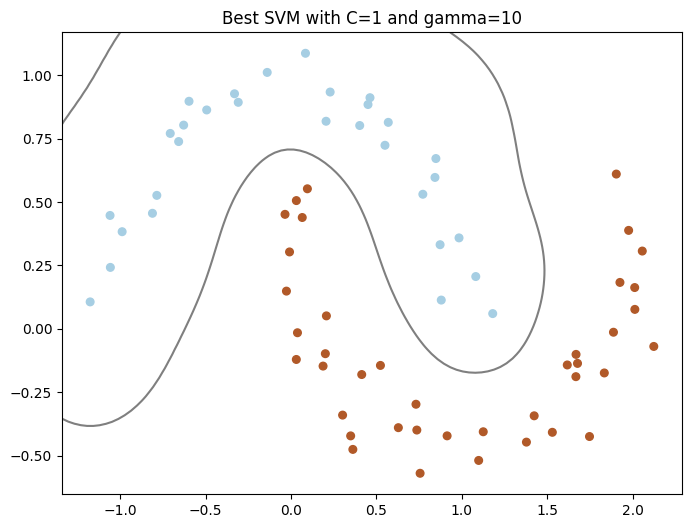

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

# Generate dataset
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 1, 10, 100]
}

# Create a SVC model
svc = SVC(kernel='rbf')

# Create a GridSearchCV object
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

# Evaluate the model on the test set
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

# Plot the decision boundary with the best parameters
best_svc = grid_search.best_estimator_

plt.figure(figsize=(8, 6))
plt.title(f"Best SVM with C={grid_search.best_params_['C']} and gamma={grid_search.best_params_['gamma']}")
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = best_svc.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])
ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.show()



### Explanation
1. **Data Preparation**: Generate a synthetic dataset using `make_moons` and split it into training and test sets.
2. **Parameter Grid**: Define a grid of `C` and `gamma` values to search over.
3. **GridSearchCV**: Create a `GridSearchCV` object with the SVM model and the parameter grid. Use 5-fold cross-validation and accuracy as the scoring metric.
4. **Fit the Model**: Fit the `GridSearchCV` object to the training data.
5. **Best Parameters**: Print the best parameters and the best cross-validation score.
6. **Evaluation**: Evaluate the model on the test set and print the classification report.
7. **Visualization**: Plot the decision boundary of the best model.

This approach helps in finding the optimal combination of `C` and `gamma` that maximizes the model's performance.

Similar code found with 2 license types

### Comparing logistic regression and SVM

- both ar linear classifiers
- logistic can be used wih kernels, but slow
- SVM is faster and can handle non-linear data with kernels
- logistic regression is more interpretable - outputs meaingful probabilities
- both can be extended to multi-class classification
- all data points affect fit of logistic regression
- only 'support vectors' affect fit of SVM
- logistic regression can use L2 or L1 regularization
- SVM uses L2 regularization by default, but can use L1 as well


**Logistic Regression**

- `linear_model.LogisticRegression`
- key hyperparameters: `C` (inverse regularization strength), `penalty` (L1 or L2 regularization), `multi_class` (type of multi-class), `solver` (optimization algorithm)

**Support Vector Machines**

- `svm.SVC` and `svm.LinearSVC`
key hyperparameters: `C` (inverse regularization strength), `kernel` (type of kernel), `gamma` (inverse RBF smoothness - kernel coefficient), `degree` (degree of polynomial kernel), `coef0` (independent term in kernel function)

**SGDClassifier**

- `SGDClassifier` can be used for linear SVMs with stochastic gradient descent optimization
- handles large datasets efficiently
- logreg = SGDClassifier(loss='log')
- linear SVM = SGDClassifier(loss='hinge')
- hyperparameters: `alpha` (regularization strength), `loss` (loss function), `penalty` (L1 or L2 regularization)
- `alpha` is equivalent to `1/C` in SVMs (inverse regularization strength)

Best parameters: {'alpha': 0.0001, 'loss': 'log_loss'}
Best cross-validation score: 0.8571428571428571
              precision    recall  f1-score   support

           0       0.88      0.75      0.81        20
           1       0.62      0.80      0.70        10

    accuracy                           0.77        30
   macro avg       0.75      0.78      0.75        30
weighted avg       0.79      0.77      0.77        30



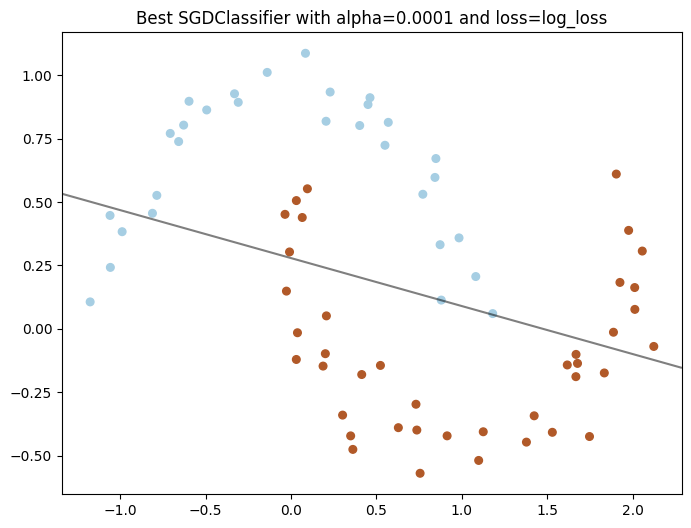

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

# Generate dataset
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'loss': ['hinge', 'log_loss']
}

# Create a SGDClassifier model
sgd = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(sgd, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

# Evaluate the model on the test set
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

# Plot the decision boundary with the best parameters
best_sgd = grid_search.best_estimator_

plt.figure(figsize=(8, 6))
plt.title(f"Best SGDClassifier with alpha={grid_search.best_params_['alpha']} and loss={grid_search.best_params_['loss']}")
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = best_sgd.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])
ax.set_xlim(xlim)
ax.set_ylim(ylim)

plt.show()